In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install mplfinance

### Close Price Over Time

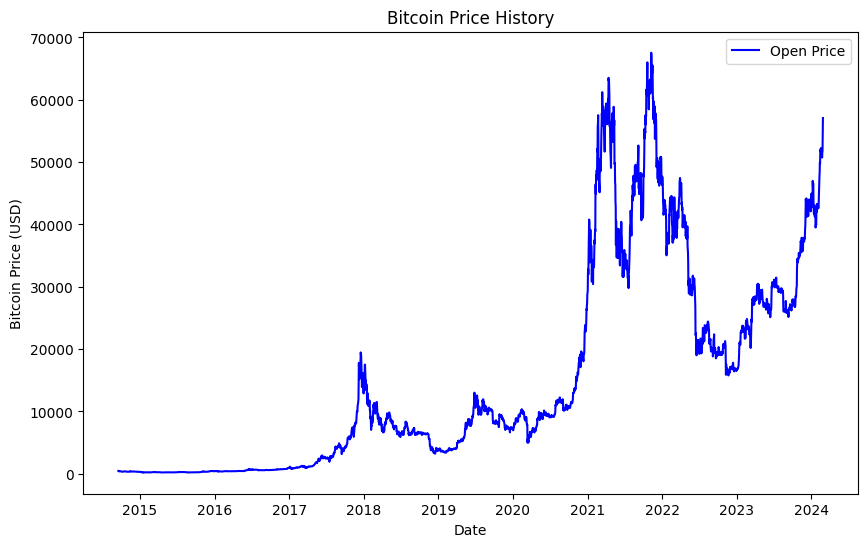

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
maindf = pd.read_csv('content/BTC-USD.csv')

# Convert 'Date' column to datetime format
maindf['Date'] = pd.to_datetime(maindf['Date'])

# Plot Bitcoin Price History
plt.figure(figsize=(10, 6))
plt.plot(maindf['Date'], maindf['Open'], label='Open Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Price History')
plt.legend()
plt.show()


### Daily Returns
The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price.

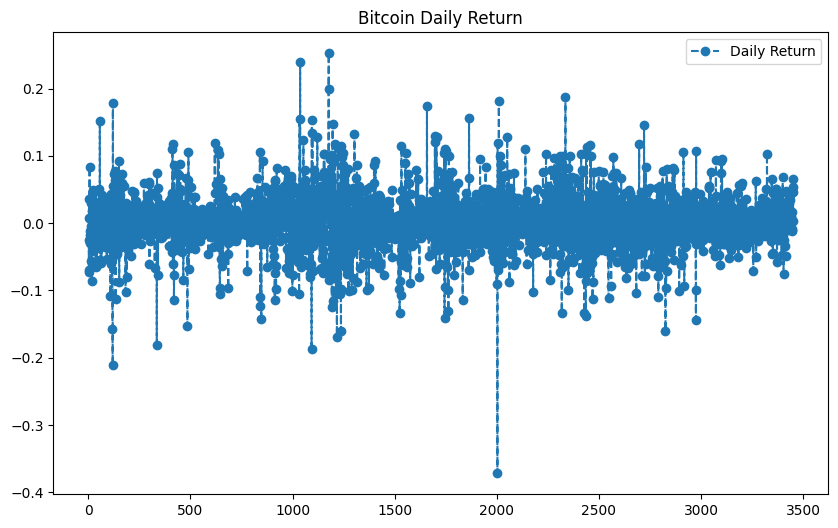

In [4]:
maindf['Daily Return'] = maindf['Close'].pct_change()
maindf['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.title('Bitcoin Daily Return')
plt.show()

### Moving Averages
Moving averages can help to identify the direction of the trend or to determine its potential support and resistance levels.

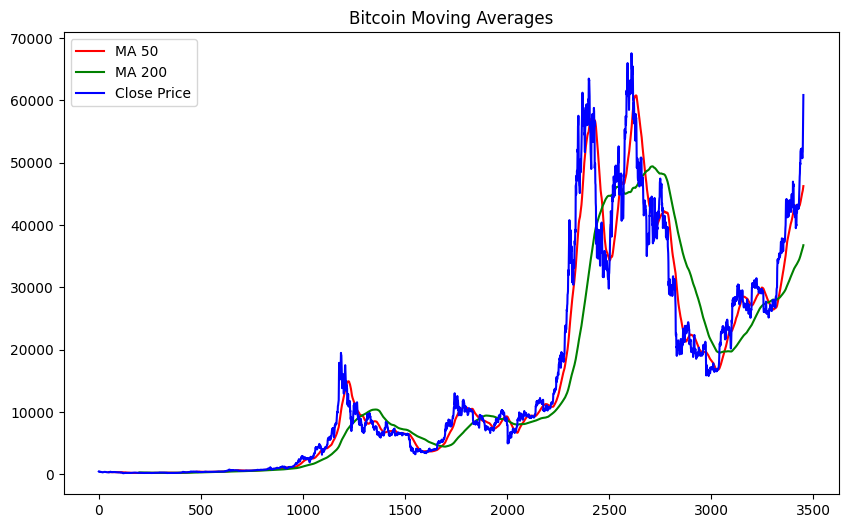

In [5]:
# Calculate moving averages
maindf['MA50'] = maindf['Close'].rolling(50).mean()
maindf['MA200'] = maindf['Close'].rolling(200).mean()

# Plot the moving averages
plt.figure(figsize=(10,6))
plt.plot(maindf['MA50'], 'r', label='MA 50')
plt.plot(maindf['MA200'], 'g', label='MA 200')
plt.plot(maindf['Close'], 'b', label='Close Price')
plt.title('Bitcoin Moving Averages')
plt.legend()
plt.show()

### Volume Weighted Average Price (VWAP)
VWAP is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price.

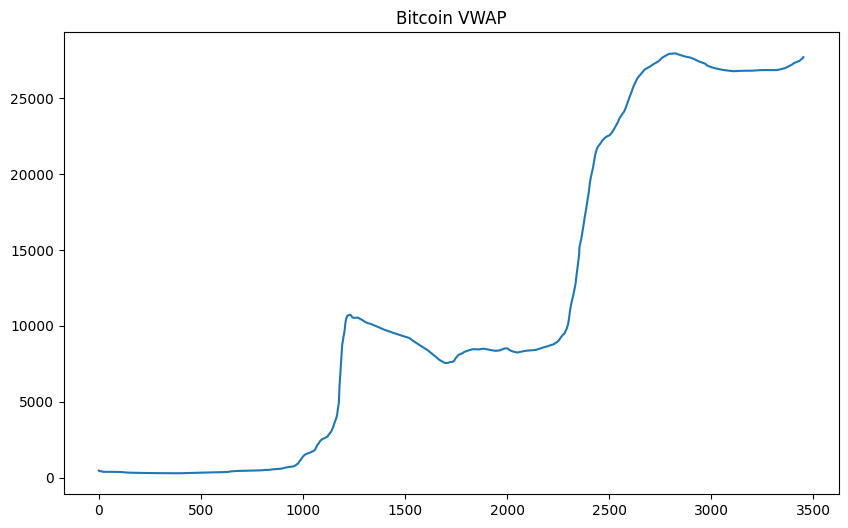

In [6]:
maindf['VWAP'] = (maindf['Volume'] * (maindf['High'] + maindf['Low'] + maindf['Close']) / 3).cumsum() / maindf['Volume'].cumsum()
maindf['VWAP'].plot(figsize=(10,6))
plt.title('Bitcoin VWAP')
plt.show()

### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

In [7]:
corr = maindf.corr()
print(corr)

                  Date      Open      High       Low     Close  Adj Close   
Date          1.000000  0.776290  0.773760  0.780257  0.776533   0.776533  \
Open          0.776290  1.000000  0.999501  0.999146  0.998853   0.998853   
High          0.773760  0.999501  1.000000  0.998988  0.999485   0.999485   
Low           0.780257  0.999146  0.998988  1.000000  0.999387   0.999387   
Close         0.776533  0.998853  0.999485  0.999387  1.000000   1.000000   
Adj Close     0.776533  0.998853  0.999485  0.999387  1.000000   1.000000   
Volume        0.623727  0.672409  0.677874  0.662519  0.671020   0.671020   
Daily Return -0.003386 -0.023357 -0.006660 -0.004610  0.008992   0.008992   
MA50          0.778971  0.979914  0.979506  0.978603  0.978426   0.978426   
MA200         0.797196  0.902888  0.901345  0.903496  0.901389   0.901389   
VWAP          0.932235  0.824917  0.821950  0.828310  0.824064   0.824064   

                Volume  Daily Return      MA50     MA200      VWAP  
Date  

### Cumulative Return: 
Cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the period of time involved.

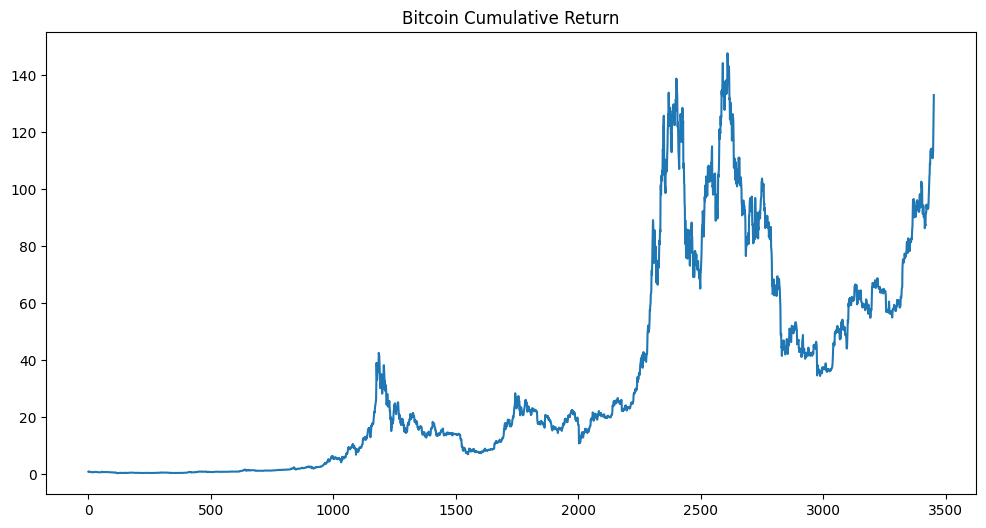

In [8]:
maindf['Cumulative Return'] = (1 + maindf['Daily Return']).cumprod()
maindf['Cumulative Return'].plot(figsize=(12,6))
plt.title('Bitcoin Cumulative Return')
plt.show()

### OHLC Chart: 
An OHLC chart, or open-high-low-close chart, is a type of bar chart that shows open, high, low, and closing prices for each period. 
using - mplfinance library to create OHLC charts.


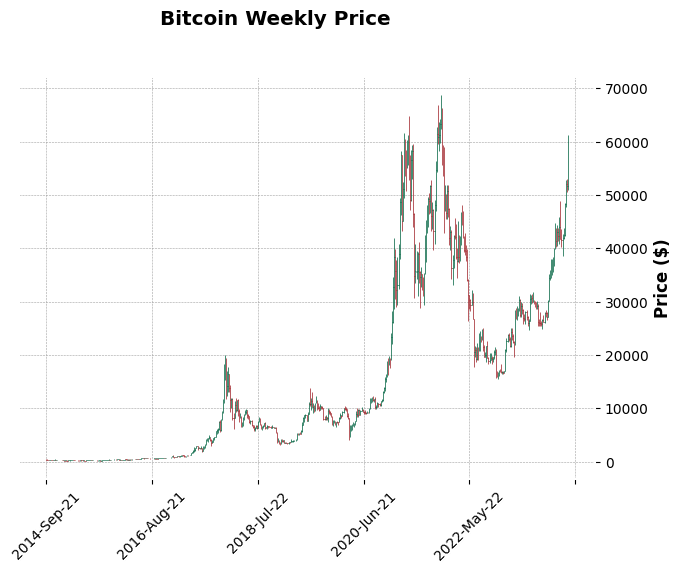

In [17]:

import mplfinance as mpf
# Convert 'Date' column to datetime format
maindf['Date'] = pd.to_datetime(maindf['Date'])

# Set 'Date' as the index
maindf.set_index('Date', inplace=True)
# Resample to weekly frequency
weekly = maindf.resample('W').agg({'Open': 'first', 
                                    'High': 'max', 
                                    'Low': 'min', 
                                    'Close': 'last'})

mpf.plot(weekly, type='ohlc', style='charles', title='Bitcoin Weekly Price', ylabel='Price ($)')

### Bollinger Bands: 
Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.

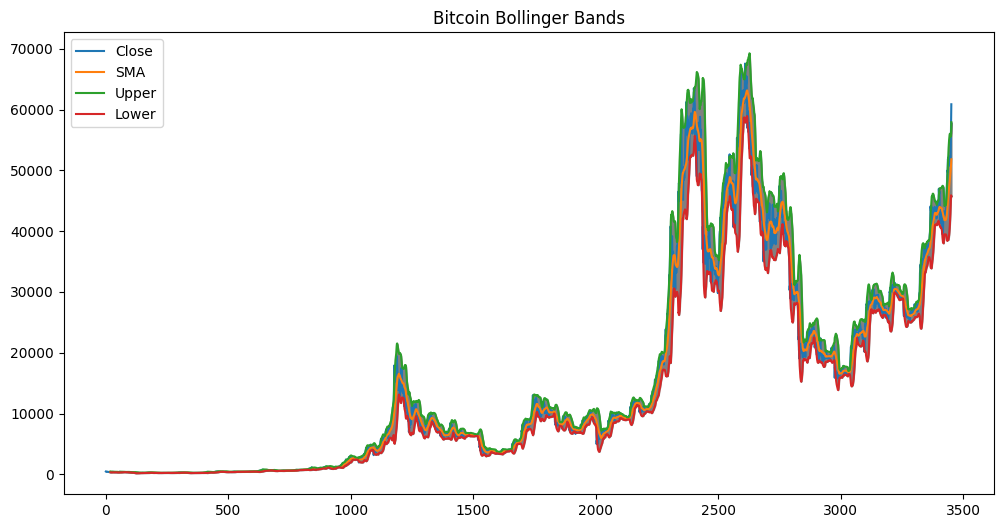

In [13]:
# Calculate mean and standard deviation
maindf['SMA'] = maindf['Close'].rolling(window=20).mean()
maindf['STD'] = maindf['Close'].rolling(window=20).std()

# Calculate Upper Bollinger Band and Lower Bollinger Band
maindf['Upper'] = maindf['SMA'] + (maindf['STD'] * 2)
maindf['Lower'] = maindf['SMA'] - (maindf['STD'] * 2)

# Plot Bollinger Bands
maindf[['Close', 'SMA', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bitcoin Bollinger Bands')
plt.fill_between(maindf.index, maindf['Lower'], maindf['Upper'], color='grey')
plt.show()

### Heatmap: 
A heatmap is a graphical representation of data where values are depicted by color. Heatmaps make it easy to visualize complex data and understand it at a glance.


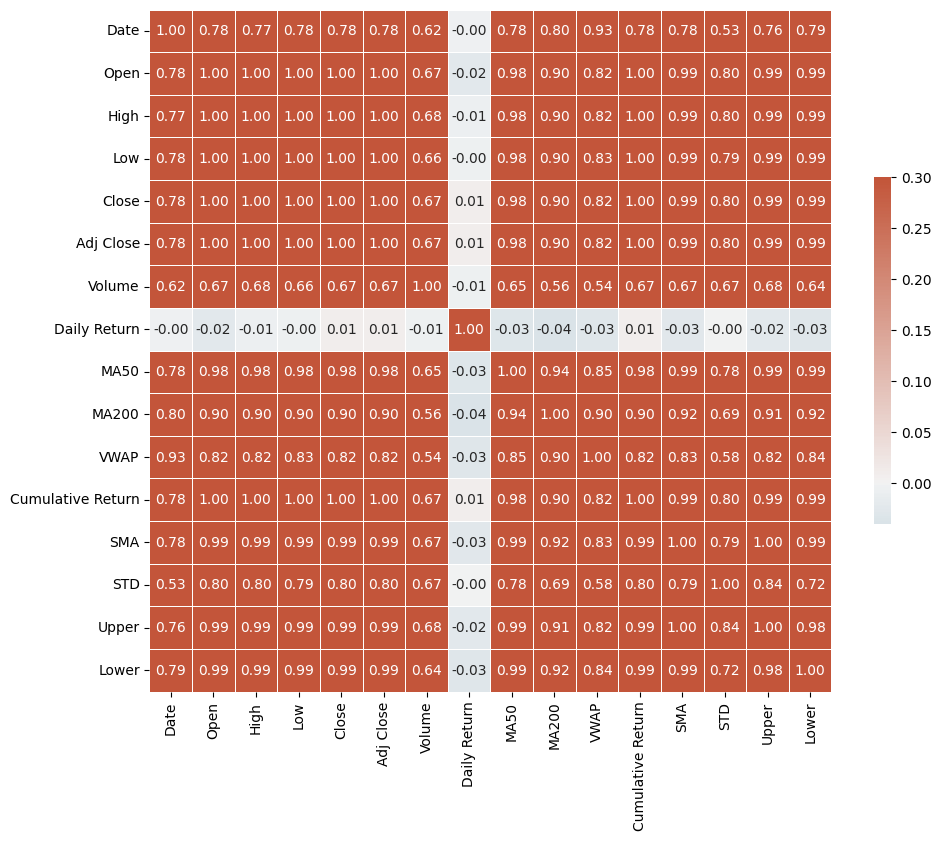

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = maindf.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()